Problem
* There are $N$ variables $x_i \in \{0, 1\}$ and also $N$ variables $y_i \in \{0, 1\}$.
* Each variable $x_i$ and $y_i$ which is zero flips to $1$ with probability $p$

Questions
* What is the expected sum $S_x = \sum_i x_i$ before the flip, given the sum after the flip
* What is the expected intersection $I_{xy} = \vec{x} \cdot \vec{y}$ before both flips, given the intersection after both flips

## Q1

Let the original number of ones be $N_T$, the number of flipped ones $N_F$, and their sum $N_S = N_T + N_F$. If $N_T$ is given, $N_F$ follows a binomial distribution

$$N_F \sim B(p, N-N_T)$$

The mean and variance of this distribution are given by
$$
\begin{eqnarray}
  \mu(N_F) &=& (N-N_T)p\\
  \sigma^2(N_F) &=& (N-N_T)p(1-p)
\end{eqnarray}
$$

The mean and variance for the variable we actually measure, $N_S$, is thus
$$
\begin{eqnarray}
  \mu(N_S) &=& \mu(N_F + N_T) = N_T + (N-N_T)p\\
  \sigma^2(N_S) &=& \sigma^2(N_F + N_T) = (N-N_T)p(1-p)
\end{eqnarray}
$$

From this, we solve that
$$
\begin{eqnarray}
  N_T^{mle} &=& \frac{N_S - pN}{1 - p}\\
  \sigma^2(N_T^{mle}) &=& \frac{p(N - N_T)}{1 - p} \approx \frac{p(N - N_S)}{(1 - p)^2}
\end{eqnarray}
$$

STD from MLE estimated to 2.956806543937496


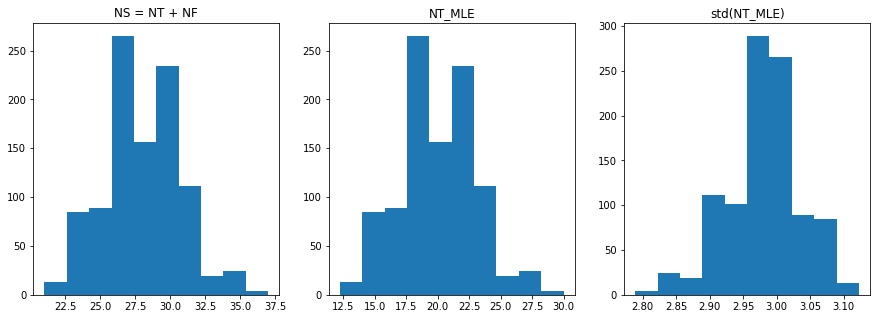

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
NT = 20
p = 0.1

NS_lst = np.array([NT + np.sum(np.random.uniform(0, 1, N-NT) < p) for i in range(1000)])
NT_MLE = (NS_lst - p*N) / (1-p)
NT_SIG = np.sqrt(p*(N - NS_lst))/(1-p)

print("STD from MLE estimated to", np.std(NT_MLE))

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].hist(NS_lst)
ax[1].hist(NT_MLE)
ax[2].hist(NT_SIG)

ax[0].set_title("NS = NT + NF")
ax[1].set_title("NT_MLE")
ax[2].set_title("std(NT_MLE)")
plt.show()

## Q2

D1 = 0.9944867175674127 * D2 + -0.4037855015954926
std(D1) = 0.6763272473547967


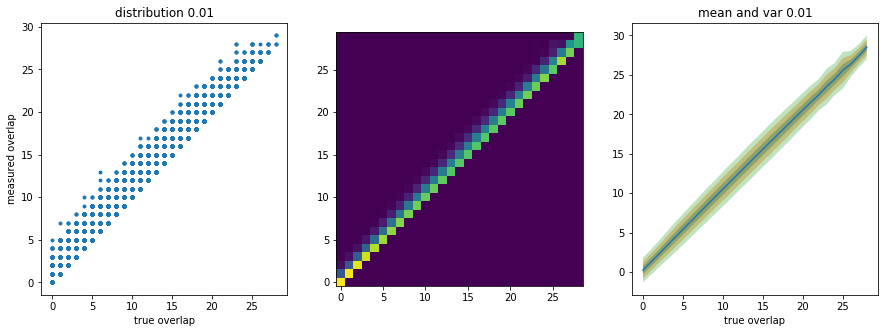

D1 = 0.9937465757843759 * D2 + -0.8634291373503458
std(D1) = 0.9563145724064361


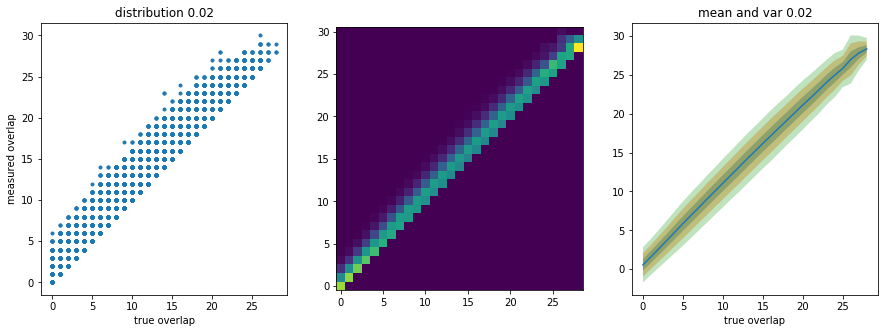

D1 = 0.9666840331425872 * D2 + -2.0546077523382564
std(D1) = 1.628052720833522


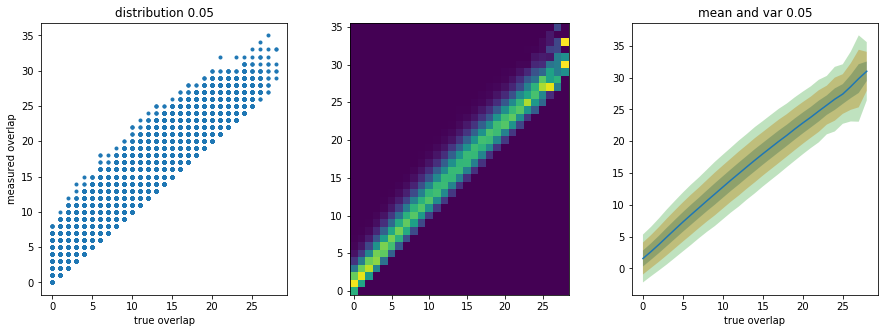

D1 = 0.9658101916763046 * D2 + -4.74989416824298
std(D1) = 2.232415843777678


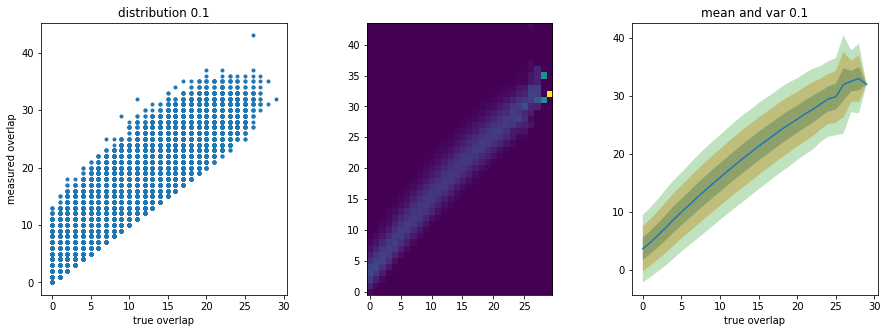

In [50]:
def flip(x, p):
    xnew = x + (np.random.uniform(0, 1, len(x)) < p).astype(int)
    xnew[xnew > 1] = 1
    return xnew

N = 12*11

for p in [0.01, 0.02, 0.05, 0.1]:
    
    D1_hist = []
    D2_hist = []

    for NT in range(10, 50):
        x_init = np.array([1]*NT + [0]*(N-NT))
        y_init = np.copy(x_init)

        for i in range(10000):
            x1 = np.random.permutation(x_init)
            y1 = np.random.permutation(y_init)
            D1_hist += [x1.dot(y1)]

            x2 = flip(x1, p)
            y2 = flip(y1, p)
            D2_hist += [x2.dot(y2)]
            
    D1_hist = np.array(D1_hist)
    D2_hist = np.array(D2_hist)
            
    D1_range = range(0, np.max(D1_hist) + 1)
    D2_mean = np.zeros(len(D1_range))
    D2_std = np.zeros(len(D1_range))
    for i, D1 in enumerate(D1_range):
        D2_this = D2_hist[D1_hist == D1]
        if len(D2_this) > 0:
            D2_mean[i] = np.mean(D2_this)
            D2_std[i] = np.std(D2_this)

    fit = np.polyfit(D2_mean, D1_range, 1)
    print("D1 =", fit[0], "* D2 +", fit[1])
    print("std(D1) =", np.mean(D2_std))

    fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
    ax[0].plot(D1_hist, D2_hist, '.')
    
    histD12 = np.zeros((np.max(D1_hist)+1, np.max(D2_hist)+1))
    for i, j in zip(D1_hist, D2_hist):
        histD12[i, j] += 1
        
    # Normalize histogram by true occurence
    for i, D1 in enumerate(D1_range):
        norm = np.sum(D1_hist == D1)
        if norm != 0:
            histD12[i, :] /= norm
    
    ax[1].imshow(histD12.transpose(), origin='lower')
    
    ax[2].plot(D1_range, D2_mean)
    ax[2].fill_between(D1_range, D2_mean-D2_std, D2_mean+D2_std, alpha=0.5)
    ax[2].fill_between(D1_range, D2_mean-2*D2_std, D2_mean+2*D2_std, alpha=0.4)
    ax[2].fill_between(D1_range, D2_mean-3*D2_std, D2_mean+3*D2_std, alpha=0.3)
    
    ax[0].set_title("distribution " + str(p))
    ax[2].set_title("mean and var " + str(p))
    ax[0].set_ylabel("measured overlap")
    ax[0].set_xlabel("true overlap")
    ax[2].set_xlabel("true overlap")
    plt.show()